In [1]:
import pandas as pd
import numpy as np
import os

# Загрузка данных

In [69]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
df #Вывод датафрейма с данными для лаб. работы. Должно быть 299 наблюдений и 6 признаков

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


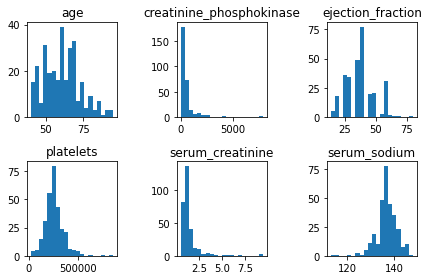

In [70]:
import matplotlib.pyplot as plt

n_bins = 20
fig, axs = plt.subplots(2,3)

axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout() # чтобы названия осей не перекрывались

plt.show()

### Диапазон для признаков
По гистограммам можно примерно определить диапазон для признаков:

age: 10 - 90

creatinine_phosphokinase: 0 - 9000

ejection_fraction: 5 - 90

platelets: 1 - 1000000

serum_creatinine: 1 - 9

serum_sodium: 0 - 160

Проверим точные значения диапазона для признаков:

In [71]:
print('age: ', df.age.min(), '-', df.age.max(),
      '\ncreatinine_phosphokinase: ', df.creatinine_phosphokinase.min(), '-', df.creatinine_phosphokinase.max(),
      '\nejection_fraction: ', df.ejection_fraction.min(), '-', df.ejection_fraction.max(),
      '\nplatelets: ', df.platelets.min(), '-', df.platelets.max(),
      '\nserum_creatinine: ', df.serum_creatinine.min(), '-', df.serum_creatinine.max(),
      '\nserum_sodium: ', df.serum_sodium.min(), '-', df.serum_sodium.max())

age:  40.0 - 95.0 
creatinine_phosphokinase:  23 - 7861 
ejection_fraction:  14 - 80 
platelets:  25100.0 - 850000.0 
serum_creatinine:  0.5 - 9.4 
serum_sodium:  113 - 148


### Самое частое наблюдение
По гистограммам можно примерно определить самое частое наблюдение:

age: 62

creatinine_phosphokinase: 1

ejection_fraction: 40

platelets: 250000

serum_creatinine: 1

serum_sodium: 139

Проверим точное самое частое значение:

In [72]:
print('age: ', df.age.mode()[0],
      '\ncreatinine_phosphokinase: ', df.creatinine_phosphokinase.mode()[0],
      '\nejection_fraction: ', df.ejection_fraction.mode()[0],
      '\nplatelets: ', df.platelets.mode()[0],
      '\nserum_creatinine: ', df.serum_creatinine.mode()[0],
      '\nserum_sodium: ', df.serum_sodium.mode()[0])

age:  60.0 
creatinine_phosphokinase:  582 
ejection_fraction:  35 
platelets:  263358.03 
serum_creatinine:  1.0 
serum_sodium:  136


In [73]:
data = df.to_numpy(dtype='float')

# Стандартизация данных

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[:150,:])

In [8]:
data_scaled = scaler.transform(data)

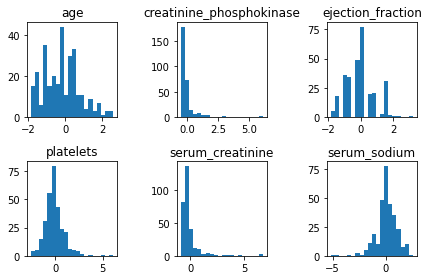

In [9]:
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout() # чтобы названия осей не перекрывались

plt.show()

Сравнивая гистограммы до стандартизации и после, можно сказать, что форма гистограм не изменилась, но значения столбцов по оси Х сдвинулись так, чтобы самое частое значение располагалось как можно ближе к нулю. 

Кроме того, до стандартизации диапазоны признаков довольно сильно отличались, теперь они все примерно похожи.

Таким образом, произошло приведение выборок к среднему, равному нулю, и к СКО, равному единице.

### Мат. ожидание и СКО до и после стандартизации
До:

In [10]:
df.agg(['mean', 'std'])

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477


После:

In [11]:
# создаем датафрейм из стандартизованных данных, чтобы было удобно считать статистики
df_scaled = pd.DataFrame(data_scaled, columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'])
df_scaled.agg(['mean', 'std'])

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,-0.169704,-0.021277,0.010502,-0.035229,-0.108641,0.037908
std,0.955423,0.815544,0.907627,1.016763,0.886913,0.972000


Как и ожидалось, значения СКО примерно равны единице, значения мат. ожидания - нулю. То есть, стандартизация для каждого признака рассчитывалась по формуле:
$$z_{ij}=\frac {x_{ij} - \bar X_j} {\sigma_j},i \in [0, 298], j \in [0, 5]$$

где 
$$z_{ij}, x_{ij} - новое\quadи\quadстарое\quadзначение\quadсоответсвенно\quad$$
$$ \bar X_{j} - среднее\quadзначение\quadстолбца\quad j$$
$$ \sigma_j - значение\quadСКО\quadстолбца\quad j$$



Так как стандартизация выполнялась не для всего датасета, СКО и мат. ожидание не равны в точности единице и нулю.

Проведем стандартизацию для всего датасета:

In [12]:
data_scaled_all = preprocessing.StandardScaler().fit_transform(data)
# создаем датафрейм из стандартизованных данных, чтобы было удобно считать статистики
df_scaled_all = pd.DataFrame(data_scaled_all, columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'])
df_scaled_all.agg(['mean', 'std'])

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,5.265205e-16,3.713120e-18,3.341808e-18,1.009969e-16,-2.227872e-18,-8.627435e-16
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00


Видим, что теперь средние по признаков с достаточно большой точностью (>15 знаков после запятой) равны нулю, а СКО равны единице с точностью два знака после запятой.

# Приведение к диапазону

In [13]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

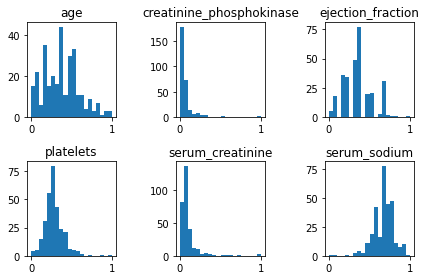

In [14]:
def print_hist(data_scaled):
  fig, axs = plt.subplots(2,3)
  axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
  axs[0, 0].set_title('age')
  axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
  axs[0, 1].set_title('creatinine_phosphokinase')
  axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
  axs[0, 2].set_title('ejection_fraction')
  axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
  axs[1, 0].set_title('platelets')
  axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
  axs[1, 1].set_title('serum_creatinine')
  axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
  axs[1, 2].set_title('serum_sodium')

  plt.tight_layout() # чтобы названия осей не перекрывались

  plt.show()

print_hist(data_min_max_scaled)

Видим, что форма распределения частот не изменилась, но диапазоны всех признаков стали у всех одинаковы: 0-1.

### Минимальное и максимальное значение для каждого признака через параметры MinMaxScaler:

In [15]:
min_max_scaler.feature_range

(0, 1)

Видим, что согласно параметрам стандартизатора диапазон значений действиетльно (0, 1).

### MaxAbsScaler

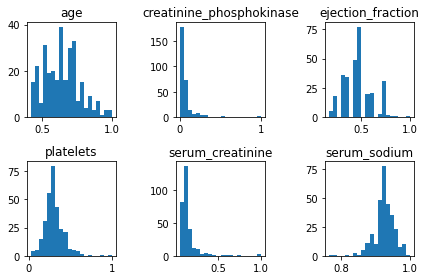

In [16]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)

print_hist(data_max_abs_scaled)

Данный стандартизатор делит значения столбцов на максимальное абсолютное значение в столбце. Таким образом, верхней границей диапазона будет единица. Посчитаем нижнюю границу:

In [25]:
scales = max_abs_scaler.scale_ # вектор делителей для каждого столбца

In [32]:
df_scaled_all = pd.DataFrame(data_max_abs_scaled, columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'])

for i in range(6):
  print('Диапазон для столбца ', i, ': (', df.iloc[:, i].min() / scales[i], ', 1 )')

Диапазон для столбца  0 : ( 0.42105263157894735 , 1 )
Диапазон для столбца  1 : ( 0.0029258364075817325 , 1 )
Диапазон для столбца  2 : ( 0.175 , 1 )
Диапазон для столбца  3 : ( 0.029529411764705884 , 1 )
Диапазон для столбца  4 : ( 0.05319148936170213 , 1 )
Диапазон для столбца  5 : ( 0.7635135135135135 , 1 )


### RobustScaler

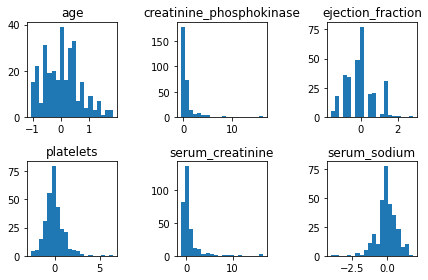

In [33]:
robust_scaler = preprocessing.RobustScaler().fit(data)
data_robust_scaled = robust_scaler.transform(data)

print_hist(data_robust_scaled)

Данный стандартизатор приводит выборку к нулевому среднему и приводит значения к диапазону между заданными квантилями (по умолчанию между первым и вторым).

In [41]:
df_scaled_all = pd.DataFrame(data_robust_scaled, columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'])

for i in range(6):
  print('Диапазон для столбца ', i, ': (', df_scaled_all.iloc[:, i].min(), ',', df_scaled_all.iloc[:, i].max(), ' )')

Диапазон для столбца  0 : ( -1.0526315789473684 , 1.8421052631578947  )
Диапазон для столбца  1 : ( -0.48764769065520946 , 16.35016111707841  )
Диапазон для столбца  2 : ( -1.6 , 2.8  )
Диапазон для столбца  3 : ( -2.6032967032967034 , 6.461538461538462  )
Диапазон для столбца  4 : ( -1.2000000000000004 , 16.600000000000005  )
Диапазон для столбца  5 : ( -4.0 , 1.8333333333333333  )


### Диапазон [-5, 10]

In [84]:
def set_range(df):
  res = df.copy(deep=True)

  for col in res.columns:
    res[col] = (res[col] - df[col].min()) / (df[col].max() - df[col].min()) * (10 + 5) - 5

  return res

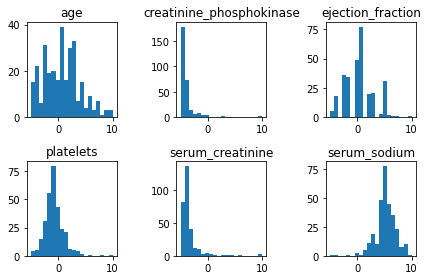

In [86]:
df_range = set_range(df)
data_range = df_range.to_numpy(dtype='float')
print_hist(data_range)

# Нелинейные преобразования

### QuantileTransformer

In [42]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100,
random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

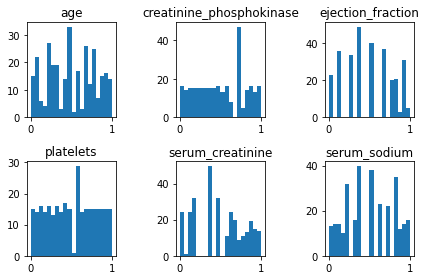

In [44]:
print_hist(data_quantile_scaled)

Видим, что выборки признаков теперь имеют диапазон (0,1), а высоты столбцов стали более сосредоточенными вокруг определенных для каждого признака значений.

n_quantiles - параметр, который задает число квантилей для вычисления, а следовательно и число отрезков в кумулятивной функции распределения F:

$$G^{-1}(F(X)),$$

где G^(-1) - квантильная функция для равномерного распределения.

### QuantileTransformer for normal 

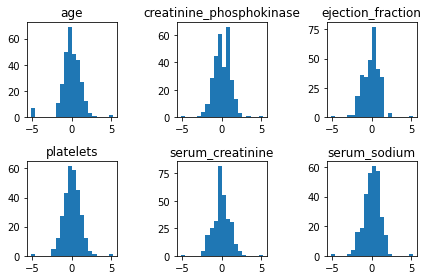

In [47]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100,
random_state=0, output_distribution='normal').fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

print_hist(data_quantile_scaled)

Аналогично, видим, что распределения признаков стали более походить на нормальные с нулевым средним.

### PowerTransformer

Так как в исходных данных нет отрицательных значений, будем использовать метод box-cox.

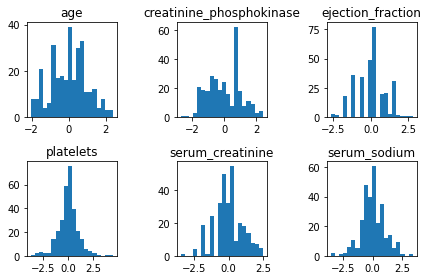

In [54]:
power_transformer = preprocessing.PowerTransformer(method='box-cox').fit(data)
data_normal_scaled = power_transformer.transform(data)

print_hist(data_normal_scaled)

# Дискретизация признаков

Параметры:

ordinal - возвращает метки стобцов в каждой ячейке

uniform - столбцы имеют одинаковую ширину

In [77]:
est = preprocessing.KBinsDiscretizer(n_bins=[3,4,3,10,2,4], encode='ordinal', strategy='uniform')
est.fit(data)
data_bins = est.transform(data)

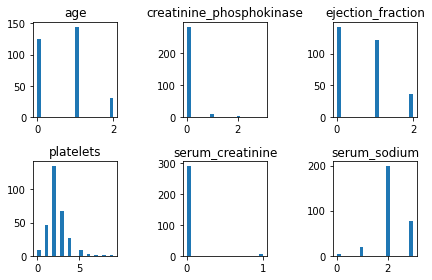

In [78]:
print_hist(data_bins)

Получились гистограммы с заданным числом столбцов, в которые входят части выборок.

Границы столбцов по признакам:

In [81]:
for i  in range(6):
  print('Столбец ', i, ':', est.bin_edges_[i])

Столбец  0 : [40.         58.33333333 76.66666667 95.        ]
Столбец  1 : [  23.  1982.5 3942.  5901.5 7861. ]
Столбец  2 : [14. 36. 58. 80.]
Столбец  3 : [ 25100. 107590. 190080. 272570. 355060. 437550. 520040. 602530. 685020.
 767510. 850000.]
Столбец  4 : [0.5  4.95 9.4 ]
Столбец  5 : [113.   121.75 130.5  139.25 148.  ]
